<a href="https://colab.research.google.com/github/DaniyalK03/PML/blob/main/SGD_Curve_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursework A

**Submission by SN: 21015796**


The following notebook is submitted coursework A for PHAS0056.

This notebook builds a Stochastic Gradient Descent model training a 1st degree polynomial model to fit to a 1st degree polynomial dataset. The models are expanded to include 1st, 3rd and 7th degree polynomial models trained to fit to a 3rd degree polynomial dataset with comparisons between each fit. Finally, the 1st, 3rd and 7th degree polynomial models are fitted to a 3rd degree polynomial dataset with datapoints exceeding the bounds of the datasets used to train the models.

*Bibliography*

[1] OpenAI, "ChatGPT 3.5", 2023

[2] R. Nichol, "Week1_CurveFitting,ipynb", UCL, PHAS:0056, 2023

In [ ]:
###############################################################################

#Importing backend

import numpy as np #numpy library for various functions and array methods

import matplotlib.pyplot as plt # for plotting
import matplotlib

matplotlib.rcParams['figure.dpi']=100 # Display for figures


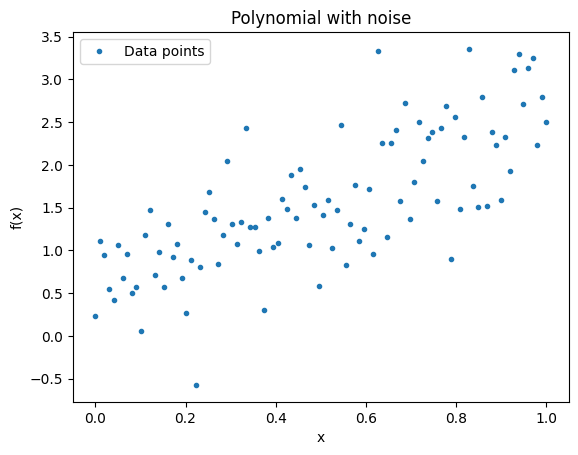

In [ ]:
def polyModelWithNoise(x,theta,sigma):

  '''
  Inputs: x = array of uniformly distributed values
          theta = The parameters of the polynomial in increasing order for the outputted set of data points
          sigma = standard deviation for gaussian added to function to create noise

  Outputs:y = array of data points for polynomial function with added noise

  Creates a set of data points fitted to an arbitrary degree polynomial with added noise.
  Degree of outputted polynomial determined by number of parameters inputted into theta array.
  The level of noise can be varied by adjusting sigma value.
  '''

  xmean = np.mean(x)
  noise = np.random.normal(xmean, sigma, len(x)) # Values to create noise function of Gaussian with standard deviation = 0.5
  y = np.polyval(np.flip(theta), x) + noise # theta flipped to generate polynomials with parameters in increasing order
  return y

xpoints = np.linspace(0,1,100) # 100 uniformly distributed between x = 0 to x = 1
plt.plot(xpoints, polyModelWithNoise(xpoints, np.array([0,2]), 0.5), ".", label = "Data points") # Plotting polynomial with theta = [0,2] and noise function of sigma = 0.5
#Labelling
plt.title("Polynomial with noise")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc="best");

In [ ]:
def polyGradient(x,theta):

  '''
  Inputs: x = array of uniformly distributed values
          theta = The parameters of the polynomial in increasing order to be differentiated

  Outputs:yderiv_array = array of polynomial differentiated with respect to the theta parameters

  This function differentiates the polynomial with the associated parameters with respect to each parameter outputting the gradient as an array of arrays.

  Note: Only used ChatGPT 3.5 to reshape into 2D array for correcting output form, this is only instance of such use.
  '''

  yderiv_arr = np.array([]) # Initial empty array to add gradient arrays to
  powers = range(0,len(theta)) # Range of powers for the gradient of polynomial
  for i in powers:
    yderiv = np.array(np.power(x,i)) # Gradient of polynomial with respect to each parameter
    yderiv_arr = np.concatenate((yderiv_arr, yderiv), axis=0) # Joining the arrays into single array
  yderiv_arr = yderiv_arr.reshape(len(theta),x.size) # Reshaped to a 2D array with assitance from ChatGPT 3.5 [1]
  return yderiv_arr

In [ ]:
polyGradient(np.linspace(0,1,100), [0,2]) # 2D array of gradients

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

In [ ]:
loop_steps = 100 # Number of steps for loop

In [ ]:
def avg_fake_chisq(x, theta):

  '''
  Inputs: x = array of uniformly distributed values
          theta = The parameters of the polynomial in increasing order for the fit model

  Outputs:avg_fake_chisq = Cost function value (Average of fake Chi squared value)

  This function adapts code from the example notebook to determine values for the average fake chi squared that can be a value to be minimised later. [2]
  '''

  truth_para = (np.array([0,2]), 0.5)
  avg_fake_chisq = np.mean(((polyModelWithNoise(x, theta, 0)) - (polyModelWithNoise(x,*truth_para)))**2)
  return avg_fake_chisq

In [ ]:
def plotmodeltodata(theta, true_theta, true_noise,graph, xpoints_array=np.array([0,1])):

  '''
  Inputs: theta = Initial guess for model fit polynomial paramters
          true_theta = Parameters for true polynomial data points model is being fitted to
          true_noise = Standard deviation for Gaussian that adds noise to the function
          graph = Optionally plots the true datapoints and fitted model if True inputted
          xpoints_array = Minimum and maximum values over which data points and fit are to be plotted

  Outputs:chisq_array = Array of the average fake chi squared values that have been minimised after all steps

  This function plots a fitted polynomial model to a desired polynomial data set with an array of chi squared values that have been minimised.
  The final chi squared and fitted polynomial parameter values are also printed.


  '''

  eta = 0.5 # Learning Rate
  truth_para = (true_theta, true_noise) # True parameters for polynomial data points that model is being fitted to

  # Arrays initalised for plotting below have been adapted from example notebook [2]
  xpoints = np.linspace(xpoints_array[0], xpoints_array[-1], 100) # Range over which data points and fit are plotted
  chisq_array=np.zeros(loop_steps)  #Array for plotting
  theta_array=np.zeros((loop_steps+1,len(theta)))  #Array for plotting
  theta_array[0]=theta #Starting step

  # Loop below adapted from example notebook to update the stochastic gradient descent method
  for i in range(0, loop_steps):
    x = np.random.uniform(0, 1, 10) # Uniformly distributed points in given training range
    true_y = polyModelWithNoise(x,*truth_para) # Points that model will be fitted to
    y = polyModelWithNoise(x, theta, 0) # Values for fit model
    chisq = avg_fake_chisq(x, theta)
    chisq_array[i] = chisq # Updating cost value
    deviation = y - true_y # Difference between fitting model and true points
    theta-=eta*np.mean(deviation[None,:]*polyGradient(x,theta),axis=1) # Learning rate for incrimental step
    theta_array[i+1] = theta # Updating theta parameters for fit

  # Plotting and labelling the fitted model to the true data points and also calculating the minimised cost value
  if graph==True:
    plt.title("Graph of fitted model to dataset")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.plot(xpoints, polyModelWithNoise(xpoints,*truth_para ),".", label=f"Dataset for polynomial of degree = {len(true_theta)-1}")
    plt.plot(xpoints, polyModelWithNoise(xpoints,theta,0), "-", label=f"Model fitted using polynomial of degree = {len(theta)-1}")
    plt.legend(loc="best")
    print(f"Chi squared = {chisq:.2f}")
    print(f"Final Theta = {theta}")
  else:
    print(f"Chi squared = {chisq:.2f}")
    print(f"Final Theta = {theta}")
  return (chisq_array)

Chi squared = 0.22
Final Theta = [-0.09641589  2.02740454]


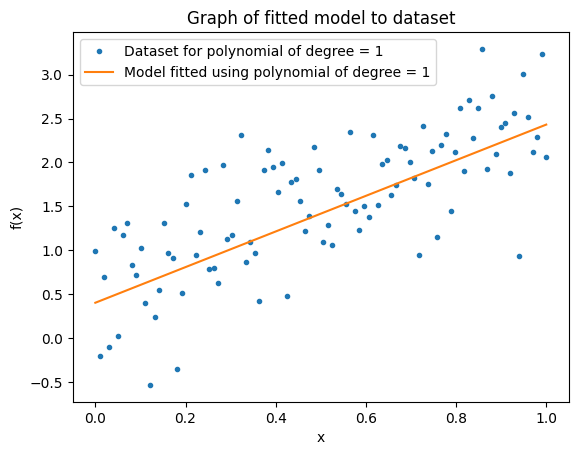

In [ ]:
onedfit = plotmodeltodata(np.array([-1, 0.5]),np.array([0,2]),0.5,True)

A 1st degree polynomial fitted to a 1st degree polynomial data set with added noise from gaussian of standard deviation = 0.5.

The chi squared value implies overfitting.

Text(0, 0.5, '(Fake) $\\chi^2$')

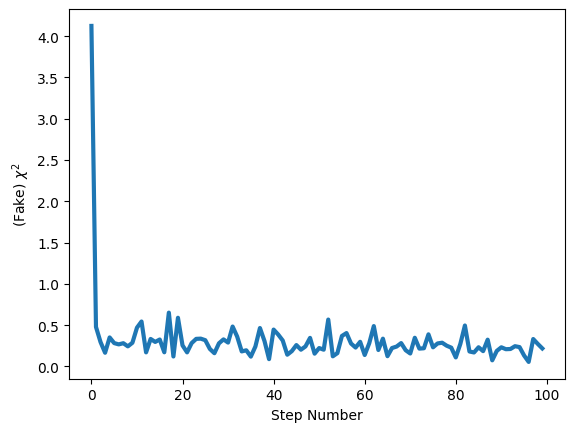

In [ ]:
# Plot of step number vs chisquared adapted from example notebook [2]
count=np.arange(loop_steps+1)  #The integers from 0 up to num steps
plt.plot(count[:-1],onedfit,linewidth=3)
plt.xlabel("Step Number")
plt.ylabel(r"(Fake) $\chi^2$")

As the number of steps increases, the chi squared value reaches a minimum thus a more accurate fit to the true dataset. It can be assumed that likelihood of an accurate fit (minimised chi squared) can be reached with a large number of steps.

Chi squared = 2.25
Final Theta = [-0.56348743  5.91722995]


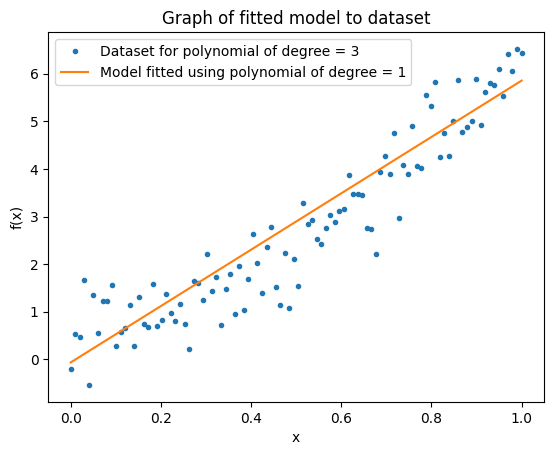

In [ ]:
plotmodeltodata(np.array([0.0, 0.0]),np.array([0,2,2,2]), 0.5, True);

A 1st degree polynomial fitted to a 3rd degree polynomial data set with added noise from gaussian of standard deviation = 0.5.

Chi squared = 1.71
Final Theta = [-0.03723346  1.93702416  2.06892513  1.93255996]


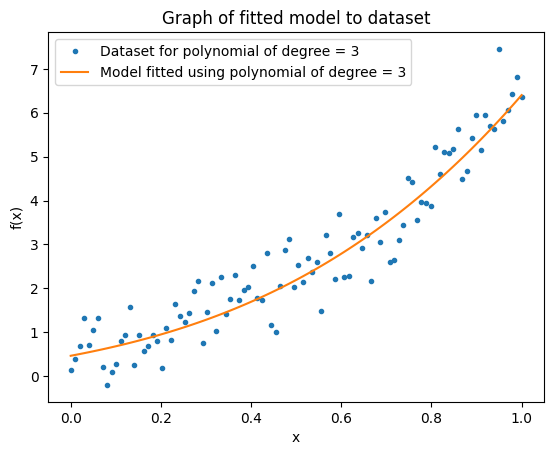

In [ ]:
plotmodeltodata(np.array([0.0,0.0,0.0,0.0]),np.array([0,2,2,2]), 0.5, True);

A 3rd degree polynomial fitted to a 3rd degree polynomial data set with added noise from gaussian of standard deviation = 0.5.

Chi squared = 3.23
Final Theta = [0.06040624 2.02295888 1.58556024 1.09056339 0.71591423 0.44277019
 0.24142756 0.0901528 ]


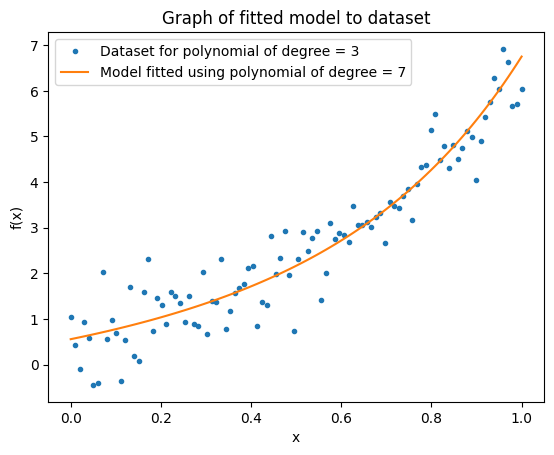

In [ ]:
plotmodeltodata(np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]),np.array([0,2,2,2]), 0.5, True);

A 7th degree polynomial fitted to a 3rd degree polynomial data set with added noise of gaussian of standard deviation = 0.5.

Chi squared = 3.69
Final Theta = [-0.59195613  5.63096126]


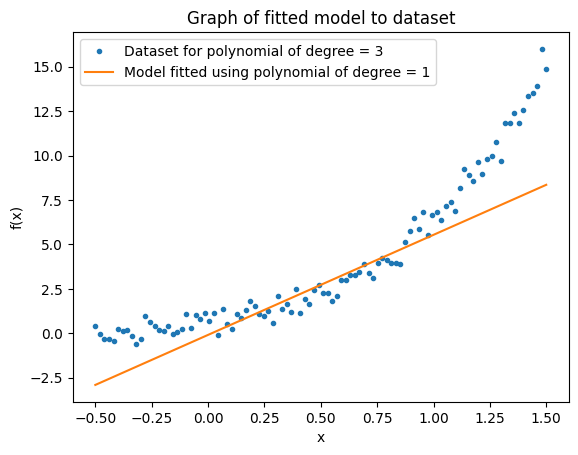

In [ ]:
plotmodeltodata(np.array([0.0,0]),np.array([0,2,2,2]), 0.5, True,np.array([-0.5, 1.5]));

A 1st degree polynomial fitted to a 3rd degree polynomial data set with added noise of gaussian of standard deviation = 0.5.

The model was trained on a range of x = 0 to x = 1 and is being used on a range of x = -0.5 to x = 1.5.

Chi squared = 0.51
Final Theta = [0.07084902 1.97647811 2.13870028 2.03445347]


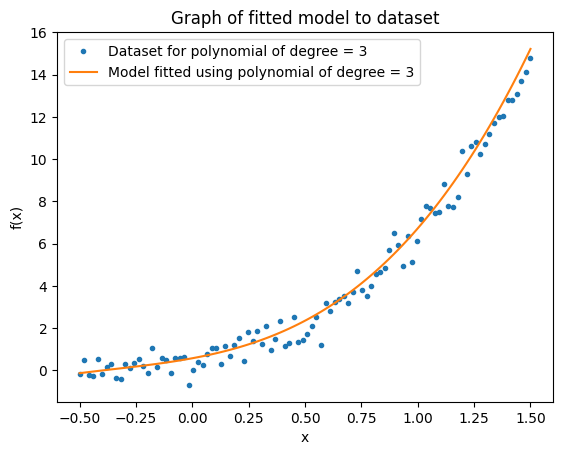

In [ ]:
plotmodeltodata(np.array([0.0,0, 0, 0]),np.array([0,2,2,2]), 0.5, True,np.array([-0.5, 1.5]));

A 3rd degree polynomial fitted to a 3rd degree polynomial data set with added noise of gaussian of standard deviation = 0.5.

The model was trained on a range of x = 0 to x = 1 and is being used on a range of x = -0.5 to x = 1.5.

Chi squared = 1.90
Final Theta = [0.13159014 1.93506336 1.56073716 1.10823949 0.75158978 0.48768292
 0.29449651 0.1527864 ]


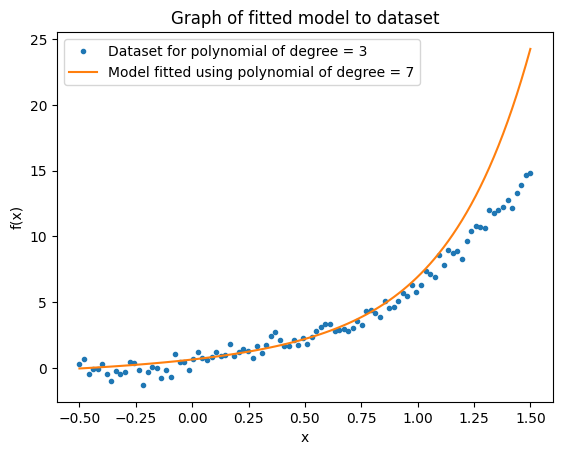

In [ ]:
plotmodeltodata(np.array([0.0,0, 0, 0, 0, 0, 0, 0]),np.array([0,2,2,2]), 0.5, True,np.array([-0.5, 1.5]));

A 7th degree polynomial fitted to a 3rd degree polynomial data set with added noise of gaussian of standard deviation = 0.5.

The model was trained on a range of x = 0 to x = 1 and is being used on a range of x = -0.5 to x = 1.5.

As expected, the 3rd degree polynomial fit displays the lowest chi squared value, hence most accurate fit, to the 3rd degree polynomial data set, even outside the range of training values.

Additionally, it can be observed that the 7th degree polynomial can also accurately fit the true the data set as there are more parameters enabling a greater flexibility in the range of data sets the model can fit to, even outside of the range of training values.